In [60]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=["target"])

In [61]:
x = df_x.values
y = df_y.values

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)


(((353, 10), (353, 1)), ((89, 10), (89, 1)))

In [63]:
def model(x, w, b):
    y = np.dot(x, w) + b
    return y

In [64]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  
    return mse

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

In [65]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [66]:
LEARNING_RATE = 0.01
num_features = x_train.shape[1]
w = np.random.randn(num_features)
b = np.random.randn()

losses = []

In [67]:
for i in range(1, 2001):
    dw, db = gradient(x_train, w, b, y_train)
    w -= LEARNING_RATE * dw    
    b -= LEARNING_RATE * db   
    L = loss(x_train, w, b, y_train)
    losses.append(L) 

In [68]:
prediction = model(x_test, w, b)
prediction = np.squeeze(prediction)

error = loss(x_test, w, b, y_test)

print("Test Loss:", error)


Test Loss: 5361.49576286581


In [69]:
print("Shape of x_test[:, 0]:", x_test[:, 0].shape)
print("Shape of prediction:", prediction.shape)


Shape of x_test[:, 0]: (89,)
Shape of prediction: (89,)


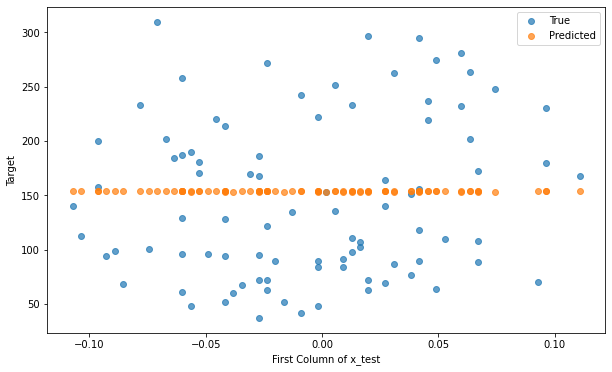

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(x_test[:, 0], y_test, label="True", alpha=0.7)

plt.scatter(x_test[:, 0], prediction, label="Predicted", alpha=0.7)

plt.xlabel("First Column of x_test")
plt.ylabel("Target")
plt.legend()
plt.show()



